<h1>Esercitazioni</h1>
<h2>Anagrafica</h2>

Esercitazione circa l'utilizzo di Dataframe, Serie e le librerie pandas e numpy per l'utilizzo di una sintassi corretta. 

In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

with open('/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/Anagrafica.csv', 'r') as heroes_file:
  anagrafica_reader = csv.reader(heroes_file, delimiter=' ', quotechar='"')
  anagrafica = list(anagrafica_reader)[1:]


<h4>Serie</h4>
Creo una serie in cui associo il peso al mio giocatore.

In [2]:
weight = [int(a[2]) if a[2] else None for a in anagrafica]
names = [n[0] for n in anagrafica]
series_weight = pd.Series(weight, index = names)
series_weight.head()

Giocatore1     76
Giocatore2     75
Giocatore3     70
Giocatore4     72
Giocatore5    130
dtype: int64

<h5>Operazioni</h5>

Estraggo da `series_weight` solo i giocatori con peso compreso tra 80 e 83 inclusi.

Da notare la sintassi. uso l'operatore d'accesso `[]` dentro cui inserisco `[query]`. 

Risultato `serie[[query]]`.

Operazione di *list comprehension*

In [3]:
series_weight[[80 < y < 84 for y in series_weight]]

Giocatore14     83
Giocatore43     83
Giocatore51     83
Giocatore64     81
Giocatore104    82
Giocatore118    82
Giocatore169    82
Giocatore173    81
Giocatore264    82
Giocatore293    82
Giocatore327    83
Giocatore335    82
Giocatore340    81
Giocatore345    82
Giocatore354    83
Giocatore385    83
Giocatore391    83
Giocatore392    82
dtype: int64

Eseguo una query ma questa volta senza *list comprehension*. Tutti i giocatori con peso = 80. Se voglio fare una query per il giocatore con peso comrpeso tra 2 valori devo utilizzare la *list comprehension* descritta sopra.

In [4]:
series_weight[series_weight == 80].head(5)

Giocatore8     80
Giocatore17    80
Giocatore22    80
Giocatore30    80
Giocatore44    80
dtype: int64

Utilizzo `value.count()` per contare le frequenze assolute dei miei valori peso.

In [5]:
series_weight.value_counts()

70     43
80     28
85     23
75     21
60     19
       ..
55      1
77      1
47      1
105     1
98      1
Length: 67, dtype: int64

Aggiungo ora l'ordinamento con `sort_index()`. Ciò che resistuisco con la linea di codice è una `Series` di `pandas` che ha come *indice* il valore della mia serie *originale* (ossia il peso) e come valore le mie frequenze. poi ordinate per indice della nuova serie `weigh_freq`.  

In [6]:
weight_freq = series_weight.value_counts().sort_index()
weight_freq

20     1
24     1
45     2
46     1
47     1
      ..
115    2
120    2
124    1
130    1
135    1
Length: 67, dtype: int64

<h>Graficare</h5>

Adesso grafico la mia serie.<br>Notare come non grafico la mia serie `series_weight` ma la mia serie `weight_freq` tramite il metodo `plot.bar()`.<br>Così ho un grafico a barre in cui associo una barra (frequenza assoluta) al peso (indice della serie).

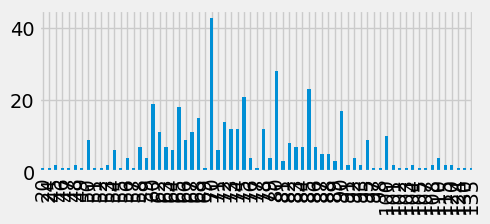

In [7]:
weight_freq.plot.bar()
plt.show()

Questo grafico è carino ma non bello. `pandas` posiziona le barre una accanto all'altra non sul grafico delle ascisse.

Cerco di visualizzare solo alcuni valori cambiando la visualizzazione in questo modo.

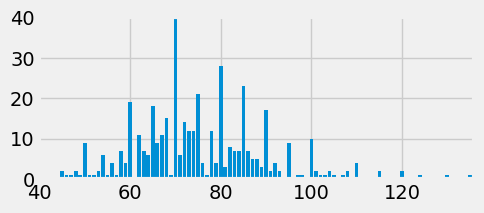

In [8]:
plt.bar(weight_freq.index, weight_freq.values)
plt.xlim((40, 136))
plt.ylim(0, 40)
plt.show()

<h4>Dataframe</h4>

<h5>Accesso</h5>

Leggo il file e lo salvo con tipo `Dataframe` di `pandas`.
Devo anche specificare il mio indice del mio `Dataframe` con l'indice relativo alla colonna in cui sono salvati i miei dati indice.

In [37]:
player = pd.read_csv('/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/Anagrafica.csv', sep = ' ', index_col=0);
player.head(5)

AttributeError: module 'pandas' has no attribute 'reader_csv'

Ora posso accedere al `Dataframe` tramite il nome dei miei campi.<br>Ciò che ottengo è `Serires` di `pandas` in cui associo il mio `id` (definito nella lettura del csv) al mio campo di cui voglio il valore.

In [10]:
player['ETA']

NOME
Giocatore1      47
Giocatore2      81
Giocatore3      75
Giocatore4      75
Giocatore5      49
                ..
Giocatore430    48
Giocatore431    39
Giocatore432    54
Giocatore433    64
Giocatore434    43
Name: ETA, Length: 434, dtype: int64

Per accedere a quello specifico `id` e visualizzarne i suoi valori posso usare uno *slicing*. Ciò che ottengo è un `Dataframe` in quanto leggo una singola "fetta".

In [11]:
player['Giocatore1':'Giocatore1']

,ETA,PESO,ALTEZZA,SESSO
NOME,,,,
Giocatore1,47,76,170,2


Se voglio leggere invece solo una valore del mio `Dataframe` posso usare il metodo `loc`. Ciò che oottengo è un tipo `Series` in cui ho tutti i valori del `id` specificato.

In [12]:
player.loc['Giocatore1'].index

Index(['ETA', 'PESO', 'ALTEZZA', 'SESSO'], dtype='object')

Un altro modo di usare `loc` è anche specificare i campi che si vogliono visualizzare. Notar bene che ciò che ottengo è un `Dataframe`.

In [13]:
player.loc['Giocatore1' : 'Giocatore5', 'ETA' : 'ALTEZZA']

,ETA,PESO,ALTEZZA
NOME,,,
Giocatore1,47,76,170
Giocatore2,81,75,170
Giocatore3,75,70,168
Giocatore4,75,72,178
Giocatore5,49,130,182


Ovviamente posso usare anche `iloc` per accedere alle righe. Attenzione, qua ottengo un dataframe a differenza di `loc`.

In [14]:
player.iloc[1:1]

,ETA,PESO,ALTEZZA,SESSO
NOME,,,,


Come in `loc` con `iloc` posso accedere, tramite posizione, a determinati campi ottenendo un `Dataframe`.

In [15]:
player.iloc[[3,4] , [1,2]]

,PESO,ALTEZZA
NOME,,
Giocatore4,72,178
Giocatore5,130,182


In realtà per accedere alla singola posizione posso usare `at` e `iat` che hanno la stesso funzione di `loc` e `iloc` senza però la possibilità di fare *slicing*. La funzione per cui sono stati introdotti è l'efficienza.

In [16]:
player.at['Giocatore1', 'ETA']

47

In [17]:
player.iat[0, 0]


47

<h5>Operazioni</h5>

Posso ordinare il mio `dataframe` tramite `sort_values` che mi esegue un *sort* in relazione al parametro opzionale `by`.<br>Posso anche specificare l'ordine in cui lo vogio. `ascending=False`.<br>Ho un `Dataframe`

In [18]:
player.sort_values(by="ETA", ascending=False)

,ETA,PESO,ALTEZZA,SESSO
NOME,,,,
Giocatore421,100,50,150,1
Giocatore322,98,70,170,2
Giocatore229,94,65,150,1
Giocatore205,93,68,175,2
Giocatore257,92,68,170,2
...,...,...,...,...
Giocatore219,36,67,170,2
Giocatore231,36,60,162,1
Giocatore425,35,65,160,2


Ovviamente l'ordinamente secondo l'indice è possibile tramite il metodo `sort_index()`

In [19]:
player.sort_index()[:5]

,ETA,PESO,ALTEZZA,SESSO
NOME,,,,
Giocatore1,47,76,170,2
Giocatore10,80,75,178,2
Giocatore100,72,110,175,2
Giocatore101,81,70,170,2
Giocatore102,71,60,158,2


Più interessante è cercare di eseguire delle *query* come nelle serie. L'idea è sempre quella che viene generata una lista di `boolean` per selezionare le righe.<br>Con i `Dataframe` però il concetto si amplia potendo selezionare più colonne

In [20]:
player[player['ETA' ] > 47]

,ETA,PESO,ALTEZZA,SESSO
NOME,,,,
Giocatore2,81,75,170,2
Giocatore3,75,70,168,1
Giocatore4,75,72,178,2
Giocatore5,49,130,182,2
Giocatore6,64,85,162,1
...,...,...,...,...
Giocatore427,71,60,160,1
Giocatore429,64,62,160,2
Giocatore430,48,95,180,2


<h3>Indici</h3>

In [21]:
player = pd.read_csv('/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/Anagrafica.csv', sep=" ", index_col=0);
player


,ETA,PESO,ALTEZZA,SESSO
NOME,,,,
Giocatore1,47,76,170,2
Giocatore2,81,75,170,2
Giocatore3,75,70,168,1
Giocatore4,75,72,178,2
Giocatore5,49,130,182,2
...,...,...,...,...
Giocatore430,48,95,180,2
Giocatore431,39,101,186,2
Giocatore432,54,72,180,2


Di seguito si trovano l'utilizzo dei metodi per calcolare:<br>
    - Frequenze Assolute e Relative<br>
    - Media Campionaria<br>
    - Deviazione Standard Campionaria<br>
    - Varianza Campionaria<br>
    - Mediana Campionaria<br>
    - Moda Campionaria<br>
    

In [22]:
player["ETA"].value_counts()

70    16
64    16
71    15
72    15
60    14
      ..
92     1
32     1
94     1
93     1
35     1
Name: ETA, Length: 62, dtype: int64

In [23]:
player["ETA"].mean()

66.27188940092167

In [24]:
player["ETA"].std()

13.074834973562458

In [25]:
player["ETA"].var()

170.951309585892

In [26]:
player["ETA"].median()

67.0

In [27]:
player.mode()

,ETA,PESO,ALTEZZA,SESSO
0,64,70.0,170.0,2.0
1,70,NaN,NaN,NaN


Cerchiamo di calcolare l'indice di massa corporea

In [28]:
weight = player["PESO"]
height = player["ALTEZZA"]
names  = player.index
index_mass = pd.Series(round(height/weight), index=names)
index_mass

NOME
Giocatore1      2.0
Giocatore2      2.0
Giocatore3      2.0
Giocatore4      2.0
Giocatore5      1.0
               ... 
Giocatore430    2.0
Giocatore431    2.0
Giocatore432    2.0
Giocatore433    2.0
Giocatore434    2.0
Length: 434, dtype: float64

Forma più concisa, Si tratta di una serie con indice l'indice della `Series` `player`

In [29]:
index_mass = round(player["ALTEZZA"]/player["PESO"])
index_mass

NOME
Giocatore1      2.0
Giocatore2      2.0
Giocatore3      2.0
Giocatore4      2.0
Giocatore5      1.0
               ... 
Giocatore430    2.0
Giocatore431    2.0
Giocatore432    2.0
Giocatore433    2.0
Giocatore434    2.0
Length: 434, dtype: float64

Adesso proviamo a graficare e a visualizzare valori interessanti.

In [30]:
index_mass_freq = index_mass.value_counts().sort_index()
index_mass_freq

1.0      3
2.0    324
3.0    104
4.0      1
7.0      1
8.0      1
dtype: int64

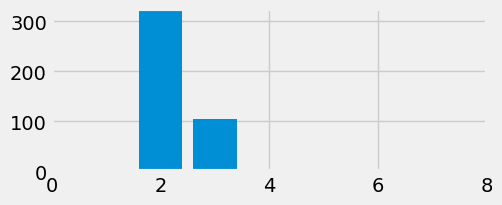

In [31]:
plt.bar(index_mass_freq.index, index_mass_freq.values)
plt.xlim((0, 8))
plt.ylim((0, 324))
plt.show()

<h3>Superhero</h3><br>
Calcolo dell'indice di massa corporea degli eroi del dataset

In [32]:
heroes = pd.read_csv('/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/heroes.csv', sep=";", index_col = 0);
heroes

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Abraxas,Abraxas,Within Eternity,Marvel Comics,NaN,NaN,M,NaN,Blue,Black,100.0,high
Abomination,Emil Blonsky,"Zagreb, Yugoslavia",Marvel Comics,203.04,441.98,M,NaN,Green,No Hair,80.0,good
Adam Monroe,NaN,NaN,NBC - Heroes,NaN,NaN,M,NaN,Blue,Blond,10.0,good
Agent 13,Sharon Carter,NaN,Marvel Comics,173.41,61.03,F,NaN,Blue,Blond,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Alan Scott,Alan Ladd Wellington Scott,Gotham City,DC Comics,180.98,90.81,M,1940.0,Blue,Blond,80.0,good
Amazo,NaN,NaN,DC Comics,257.49,173.95,M,1960.0,Red,NaN,100.0,good
Ant-Man,Hank Pym,"Elmsford, New York",Marvel Comics,211.74,122.44,M,1962.0,Blue,Blond,20.0,high


In [33]:
height = heroes["Height"]
Weight = heroes["Weight"]
index_mass_value = round(heroes["Weight"]/pow(heroes["Height"]/100, 2))
index_mass_value = index_mass_value[[y > 0 for y in index_mass_value]]
index_mass_value.value_counts()

#index_mass.values

24.0    47
25.0    41
20.0    41
26.0    37
19.0    29
        ..
97.0     1
70.0     1
67.0     1
45.0     1
79.0     1
Length: 71, dtype: int64

In [34]:
index_mass = round(heroes["Weight"]/pow(heroes["Height"]/100, 2))
index_mass_freq = index_mass_freq.sort_values(ascending=False)[2:]
index_mass_freq

2.0    324
3.0    104
1.0      3
4.0      1
7.0      1
8.0      1
dtype: int64

In [35]:
index_mass_freq = index_mass_value.value_counts().sort_index
index_mass_freq

<bound method Series.sort_index of 24.0    47
25.0    41
20.0    41
26.0    37
19.0    29
        ..
97.0     1
70.0     1
67.0     1
45.0     1
79.0     1
Length: 71, dtype: int64>

In [36]:
plt.bar(index_mass_freq.index.sort_values(ascending=False)[2:], index_mass_freq.values)
plt.show()

AttributeError: 'function' object has no attribute 'index'

<AxesSubplot: >

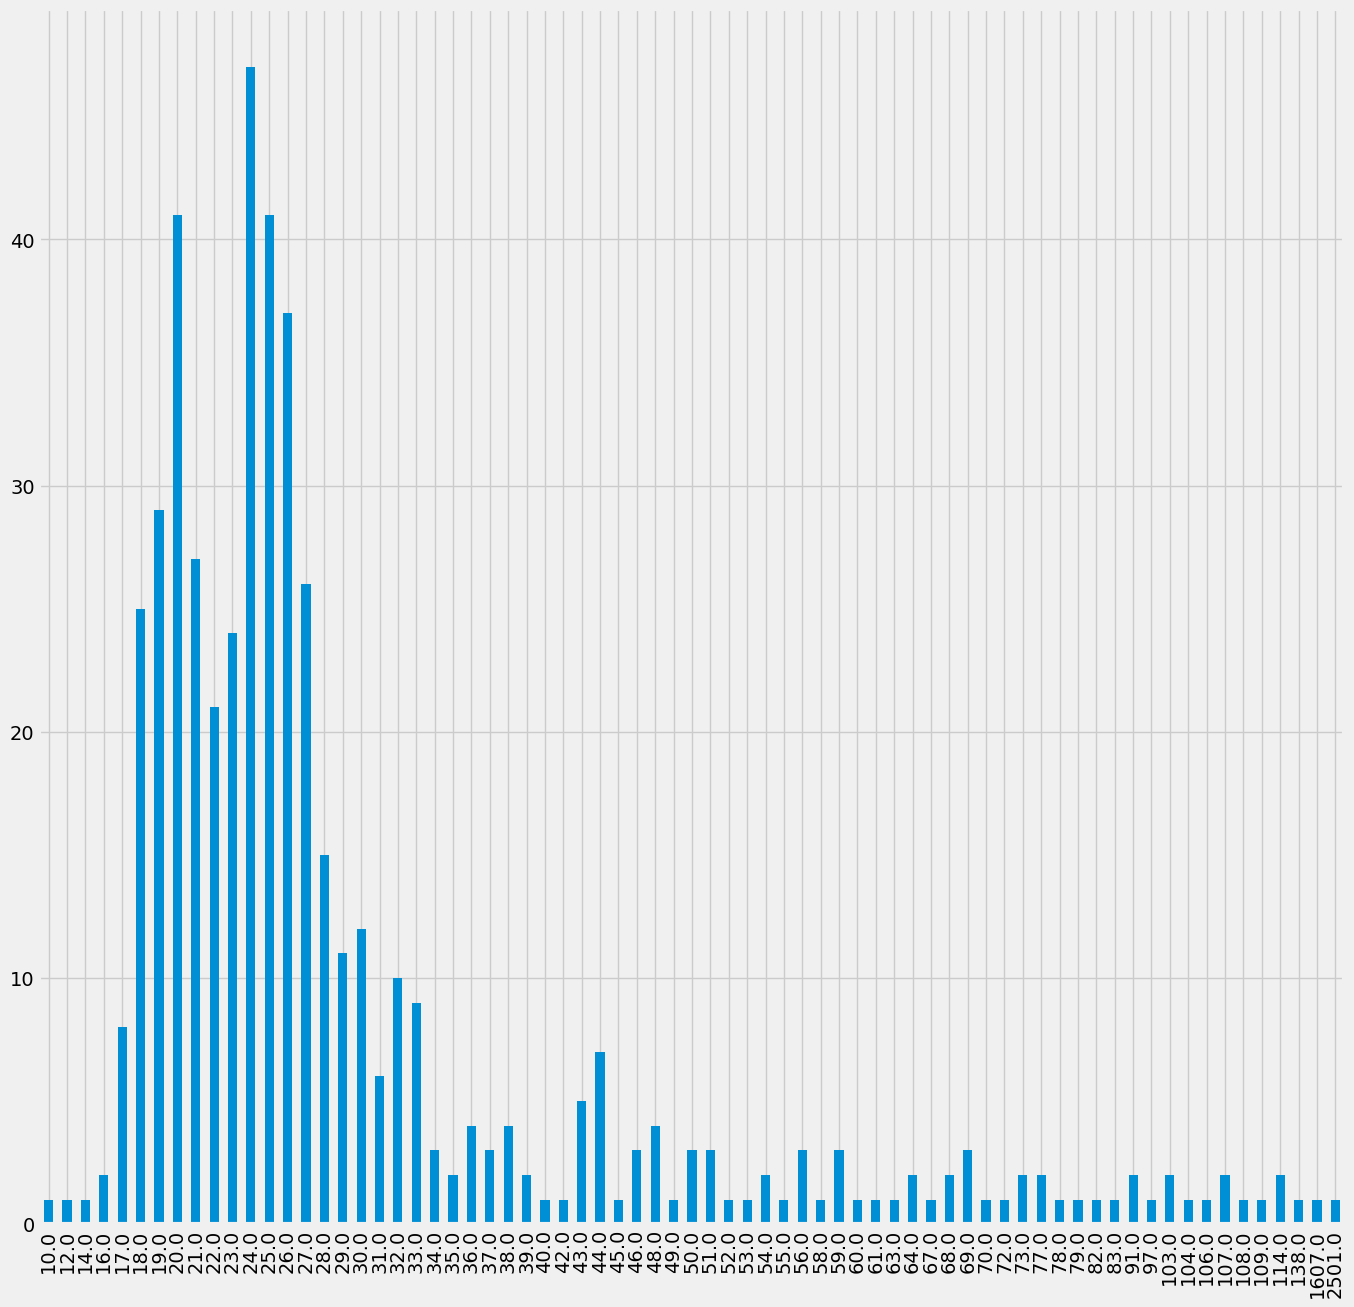

In [ ]:
index_mass_freq.plot(kind='bar', figsize=(15, 15))